In [2]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

# Experiment 3

In [3]:
stopping_voltage = np.array([-880, -625, -300]) # blue, green, red, in mV
K_max = -1/1000*stopping_voltage # max electron energy in eV
frequency = 3e8/(np.array([462, 533, 618])*1e-9) # blue, green, red, in Hz
threshold_frequency = 4.62e14 # Hz

planck_constant = K_max / (frequency - threshold_frequency)
rounded_planck = ['{:0.2e}'.format(p) for p in planck_constant]
print("Experimental Planck Constant (eV*s): ", rounded_planck)
print("Theoretical Planck Constant (eV*s): ", 4.14e-15)

Experimental Planck Constant (eV*s):  ['4.70e-15', '6.20e-15', '1.28e-14']
Theoretical Planck Constant (eV*s):  4.14e-15


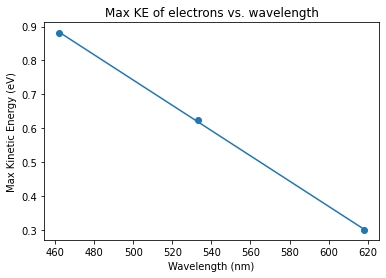

In [48]:
wavelength = np.array([462, 533, 618])
plt.scatter(wavelength, K_max)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Max Kinetic Energy (eV)')
plt.title('Max KE of electrons vs. wavelength')

a_fit,cov=curve_fit(linearFunc,wavelength,K_max)
inter = a_fit[0]
slope = a_fit[1]
yfit = inter + slope*wavelength
plt.plot(wavelength,yfit,label='Fit')

a. We use 462, 533, and 618 nm for blue, green, and red respectively, all with +/- 10 nm error. These are the values given to us in the lab, and is likely more accurate than what we can measure with our equipment.

b. We measured cutoff frequencies of -880, -625, -300 mV for blue, green, and red LEDs respectively. The measurement uncertainty of the voltage is approximately +/- 20 mV, which we estimate due to the zero offset error from the phototube and the relative fluctuations of current that we observed.

c. The threshold voltage is given to us as 4.62e14. Since this is a given value, we assume the error is 0, as the actual error is likely to be something much much smaller than our own experimental error.

In [31]:
wavelength_err = 10e-9 # m
wavelength = np.array([462, 533, 618])*1e-9 # m
frequency_err = 3e8*1/wavelength**2*wavelength_err # Hz
voltage_err = 20 # mV
K_max_err = 1/1000*voltage_err  # J

planck_err = planck_constant * np.sqrt((K_max_err/K_max)**2 + (frequency_err / frequency)**2) # error propagation
rounded_planck_err = ['{:0.2e}'.format(p) for p in planck_err]
print("Planck constant uncertainties (eV*s): ", rounded_planck_err) 
print("Work function uncertainties (eV): ", np.round(threshold_frequency*planck_err,3))

Planck constant uncertainties (eV*s):  ['1.47e-16', '2.30e-16', '8.78e-16']
Work function uncertainties (eV):  [0.068 0.106 0.406]
